The previous two notebooks might have gotten your attention but usually we get the response; 

> But what about BERT-embeddings? 

Let's explain that a bit.

In [1]:
from whatlies import Token, TokenSet
import spacy 
import matplotlib.pylab as plt

nlp = spacy.load("en_trf_robertabase_lg")

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


## Multi-Token Embeddings

We can also have embeddings that represent more than one token. 

In [2]:
def grab_context_embedding(string):
    for idx, word in enumerate(string.split(" ")):
        if word[0] == "[":
            new_string = string.replace("[", "").replace("]", "")
            spacy_token = nlp(new_string)[idx].vector
            return Token(string, spacy_token)
    return Token(string, nlp(string).vector)

contexts = ("this snake is a python",
            "i like to program in python",
            "programming is super fun!",
            "i go to the supermarket",
            "i like to code", 
            "i love animals")

t = TokenSet({k: grab_context_embedding(k) for k in contexts})

TokenSet

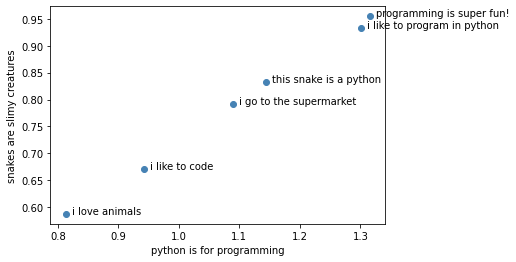

In [3]:
x_axis = grab_context_embedding("python is for programming")
y_axis = grab_context_embedding("snakes are slimy creatures")
t.plot(kind="text", x_axis=x_axis, y_axis=y_axis).plot(kind="scatter", x_axis=x_axis, y_axis=y_axis)

## Embeddings of Tokens with Context

We can go a step further too. If we have the sentence `this snake is a python` then an algorithm like Bert will not apply seperate word embeddings for each token. Rather, the entire document will first learn it's representation before assigning it to seperate tokens. If you are interested in a Bert representation of a word given the context that it is in ... you can get them with a special syntax.

In [4]:
contexts = ("i put my money on the [bank]",
            "the water flows on the river [bank]",
            "i really like swimming in the [ocean]",
            "i have plenty of [cash] on me",)

t = TokenSet({k: grab_context_embedding(k) for k in contexts})

TokenSet

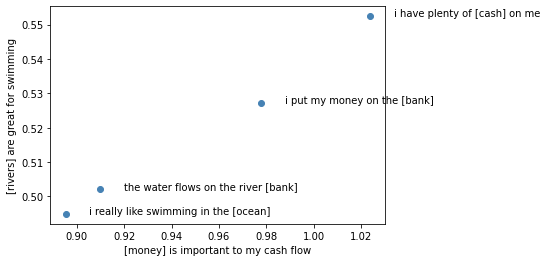

In [5]:
x_axis = grab_context_embedding("[money] is important to my cash flow")
y_axis = grab_context_embedding("[rivers] are great for swimming")
t.plot(kind="text", x_axis=x_axis, y_axis=y_axis).plot(kind="scatter", x_axis=x_axis, y_axis=y_axis)

## Realisation 

This is the demo so-far.

We need to change the `Token` part of the library. This should be called an embedding. That way we can keep everything in the same object! 

Still ... this is a nice preview of what is possible. 

Future Features; 

- if the plotting backend is plotly/c3 then we should be able to host interactive versions on the blog
- we might want to have a `LazyEmbeddingSet` such that we can also compute distances between tokens lazily, it would also be nice to have an object where we can say "use this backend" so that we might compare plots for different trained embeddings
- there are also other transformations that you might want to apply ... PCA for example ...

That said; give all feedback to Vincent and he will **WorkWork[tm]**.